In [1]:
import numpy as np
import pandas as pd
import utils as utils
from Levenshtein import distance
import matplotlib.pyplot as plt
from clustering import Clustering
from strand_reconstruction import align
from tqdm import tqdm
from strand_reconstruction import make_prediction
from pool_preprocessing import remove_adapter

In [2]:
%load_ext autoreload
%autoreload 2

## 3.5 Seconds coupling time

Full circle sequencing run of 150nt KB synthesis with lower coupling time of 3.5s and no capping. First and last 20nt have normal coupling time to ensure primers are accurate. The sample has been PCR amplified. 

In [3]:
records_1 = utils.get_fastq_records(fastq_filepath=r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\low_coupling_rate\3_5\3_5\3_5.fastq\3_5.fastq")

135319it [00:03, 38177.90it/s]


In [4]:
records_2 = utils.get_fastq_records(r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\low_coupling_rate\4_5\4_5\4_5.fastq\4_5.fastq")

388581it [00:08, 43678.80it/s]


In [4]:
original_strand = "AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTT"

In [12]:
strands_1 = [str(i.seq) for i in records_1]

In [13]:
# Remove adapter sequentially instead of chopping 20 and 20

In [14]:
strands_1 = [i[20:-20] for i in strands_1 if len(i) < 140 and len(i) > 100]

Text(0.5, 1.0, 'Original distribution of strand lengths for 4.5s coupling time')

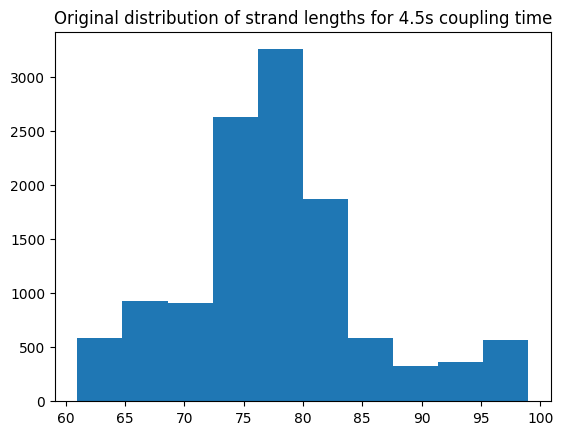

In [15]:
plt.hist([len(i) for i in strands_1])
plt.title("Original distribution of strand lengths for 4.5s coupling time")

In [16]:
t = Clustering(strand_pool=strands_1, distance_threshold=15, reference_length=110)

In [17]:
t.cluster_strand_pool(distance_threshold=15)

Total strands 12014


100%|██████████| 12014/12014 [00:01<00:00, 7080.95it/s]


Number of clusters = 641
Clusters are sorted
Orientation fixed in the strand pool


[['TTCACCAAACCTCCTAACAATAAATTATCCAAGACATTATCTAACTGACCCACTAATACATCGATCAATCTTCTA',
  'TTCACCAAACCTCCTAACAATAATTATCCCAAACATTATCCTAACTGACCACCTAATACATCCGATCAATCTCTCTA',
  'TTCACAAACTCCTGAACAATAATTATCCCAAACATTATCTTAACTACCCACTAAGATACATCCGATCCAATCTCTCTGA',
  'TTCACCAAACCTCTAACAAAATTATGCCAAACATTATCCTAATACCCACTAATACATCGATCCAATCTTCTA',
  'TTCACAAACCTCCTAACAATAATTATCGCAAACATTATCCTAACTACCCACCTAATACATCGATCCAATCTTCTGA',
  'TTTCACCAAACCTCCTGAACAATAATTATCCCAAACATAATCAACTACCACCTAATACATCCATGCCAATCTTCT',
  'TTCACCAAACTCCTAACAATAATTATCGCCAAGACATTGATCCTAACTACCGACCTAATACATCCATGCAATTCTCTGA',
  'TTCACAAACCTCCTAACAATAATTATCCAAGACATTATCTAACTACCCACTGAATACATCCATCAATCGTCTCTA',
  'TTCACCAAACCTCCTAACAATAATTATGCCAAACATTATCCTAACTGAGCGCCACCTAATACATCAGTCCAATCTCTCTGA',
  'TTTCACCAAAGGCCTCCTGAACAATAATTATCCAAACATGTTCTAACTGACCCACTAATACATCCATCCAATCTCTCTC',
  'TTCACCAAAGCTCTAACAATAATTATGCCCAAACATTATCTAACTAGGCCGACTAATACATCCGATCCAATTCTCTGA',
  'TTCACCAAACCTCCTAACAATAATTATCCAAACATTATCCTAACTACCCACCTAATACATCAGTCCAATCTTCTA',
  'TTCA

In [18]:
print(original_strand[20:-20])

TTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGG


In [19]:
len(t.cluster_heads)

641

In [20]:
t.cluster_heads[1]

'AGAGAGATTGGATGATGTATTAGGTGGCTAGTTAGGATCAATGTTTGGGCATAATTATTGTTCAGGAGTTTGGTGAAA'

In [47]:
print(align(original_strand[20: -20], t.clustered_seqs[0][0]))

target            0 TTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAAC
                  0 ||||||||--|--||||-|--||||||-||||||--|-|-||-||||--|--|||-||||
query             0 TTCACCAA--A--CCTC-T--AACAAT-AATTAT--C-C-AA-ACAT--T--ATC-TAAC

target           60 TGGAGCGCCGACCTGGAG-ATACGATCCGGAGGTGCCAGGATCGTCTCTGG- 110
                 60 |--|-|-||-||-|--|--||||-|||-|-|--|-|||--||--|-||||-- 112
query            42 T--A-C-CC-AC-T--A-CATAC-ATC-G-A--T-CCA--AT--T-TCTG-A  73



In [49]:
no_primer_original = original_strand[20:-20]

In [57]:
for i in t.clustered_seqs:
    #print(len(i))
    s = make_prediction(i, 20)
    #print(align(no_primer_original, s))
    print(distance(no_primer_original, s))
    #print(align(utils.reverse_complement(original_strand[20:-20]), s))
    print(distance(utils.reverse_complement(no_primer_original), s))
    print()
    

34
60

59
32

61
34

60
33

29
58

60
33

29
59

72
69

33
58

63
40

67
54

33
58

38
57

66
61

38
59

65
46

32
59

58
28

59
32

35
58

59
39

61
36

33
58

58
33

88
88

60
33

59
15

64
37

33
58

64
50

60
34

59
35

61
39

41
63

57
20

58
36

33
59

61
33

31
56

45
62

62
34

35
60

61
35

35
59

63
51

61
32

60
48

59
31

61
38

58
32

63
33

33
56

32
57

57
32

57
32

34
58

60
32

56
17

38
58

67
62

39
58

63
47

61
35

46
60

58
34

57
68

35
60

60
38

34
59

31
58

61
30

37
59

62
39

57
37

33
59

62
34

60
32

59
40

45
62

64
42

36
60

36
58

60
33

61
36

35
58

61
35

60
35

61
36

38
60

30
55

34
57

71
69

61
34

43
60

61
31

60
38

33
57

64
39

35
57

58
32

61
36

60
37

38
58

58
40

34
55

36
60

36
59

37
55

34
59

60
34

61
33

68
59

64
38

36
59

37
60

63
38

61
38

64
42

30
59

42
60

61
37

60
38

61
37

34
58

60
37

59
34

36
58

60
35

60
69

32
58

59
37

34
56

60
34

46
63

63
40

72
71

34
57

60
31

33
58

39
59

62
38

62
40

37
58


KeyboardInterrupt: 

In [22]:
from strand_reconstruction import make_prediction, align

distance(make_prediction(t.clustered_seqs[0], sample_size=20), original_strand)

111

In [103]:
len(predicted_strand)

152

In [105]:
predicted_strand = make_prediction(t.clustered_seqs[0], sample_size=15)
print(align(predicted_strand, original_strand))

target            0 TAGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGC
                  0 -|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 -AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGC

target           60 CAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGG
                 60 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query            59 CAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGG

target          120 ATCGTCTCTGGAACGCTCCGAAAGTCTTGTTT 152
                120 |||||||||||||||||||||||||||||||- 152
query           119 ATCGTCTCTGGAACGCTCCGAAAGTCTTGTT- 150



## Testing deletion profiles (without removing sequencing error)

In [21]:
final_strands = []
for s in t.cluster_heads:
    if distance(original_strand[20:-20], s) > distance(utils.reverse_complement(original_strand[20:-20]), s):
        final_strands.append(utils.reverse_complement(s))
    else:
        final_strands.append(s)

In [22]:
final_strands = []
for j in tqdm(t.clustered_seqs):

    prediction = make_prediction(j, 15)
    if distance(original_strand[20:-20], prediction) > distance(utils.reverse_complement(original_strand[20:-20]), prediction):
        final_strands.append(utils.reverse_complement(prediction))
    else:
        final_strands.append(prediction)

100%|██████████| 641/641 [00:17<00:00, 36.56it/s]


In [25]:
from bitwise_majority_alignment import reconstruct_dna_strand, bidirectional_alignment

In [26]:
#reconstructed_strand = reconstruct_dna_strand(final_strands, 0.3, 110)
reconstructed_strand = bidirectional_alignment(final_strands[0], 0.3, 110, 0)

In [39]:
for i in t.cluster_heads:
    print(distance(i, original_strand[20:-20]))
    print(distance(utils.reverse_complement(i), original_strand[20:-20]))
    print()

37
58

59
34

60
35

61
60

39
59

33
57

59
61

57
58

48
63

59
59

58
56

64
65

56
58

60
58

56
59

59
56

58
62

56
60

58
60

61
55

58
56

59
58

55
60

59
60

54
58

57
58

65
61

58
56

57
59

58
60

61
59

55
58

60
54

61
63

58
62

61
55

59
58

57
59

18
56

63
59

62
56

59
58

54
56

59
62

62
61

61
58

64
63

61
60

58
56

63
64

57
60

55
63

62
59

63
58

62
64

62
62

59
61

56
60

58
58

63
58

60
59

64
60

67
47

59
60

58
57

35
58

63
61

64
65

57
59

61
58

64
62

59
59

62
60

64
62

55
55

61
60

62
62

61
66

59
61

59
60

61
59

64
61

64
60

47
65

60
56

60
61

60
59

58
60

23
59

60
60

57
59

56
58

57
57

62
64

62
64

61
59

60
64

58
32

58
58

38
57

60
57

62
59

55
28

67
64

54
56

57
58

26
54

59
60

34
56

63
61

63
62

63
60

59
58

59
61

59
63

59
59

62
56

64
62

64
61

60
62

58
56

58
36

60
56

61
58

61
58

33
60

61
61

65
62

58
61

58
57

62
63

60
46

64
62

59
57

63
62

63
63

66
50

63
62

65
61

59
59

14
59

62
64

55
59


In [34]:
distance(t.cluster_heads[1], utils.reverse_complement(original_strand[20:-20]))

34

In [63]:
print(align(original_strand[20:-20], reconstructed_strand))

target            0 TT-CACCAAGGAGGC-CTC--CTGGA-A-CA-A-T-GA--A-TTATGG-CG--CC-AAGA
                  0 ||-|||||||-|--|-|||--||--|-|-||-|-|-||--|-|-|||--|---|--|-|-
query             0 TTTCACCAAG-A--CTCTCGACT--ACAGCATACTAGACTACT-ATG-AC-TAC-TA-G-

target           44 CATGGTGGATCCTAACTGGAGCG-C--C--G-A-CC-TGG-AGAT-A-CGATC--CGGAG
                 60 |||-----|-|--||||--|-||-|--|--|-|-|--||--|--|-|-|||||--|--|-
query            49 CAT-----A-C--AACT--A-CGACTACATGCATC-ATG-CA--TCATCGATCATC--A-

target           91 GT-G--C-CAGGATCGTCTCTGG- 110
                120 -|-|--|-||--|||||||||--- 144
query            91 -TCGATCTCA--ATCGTCTCT--A 110



In [60]:
print(align(original_strand[20:-20], t.cluster_heads[0]))

target            0 TTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAAC
                  0 ||||||||--|--||||||--||||||-||||||--|-||||-||||--||-|||||||-
query             0 TTCACCAA--A--CCTCCT--AACAAT-AATTAT--C-CCAA-ACAT--TG-ATCCTAA-

target           60 TGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGG- 110
                 60 |--|-|-||-||||--|-||||-||||--|--|-|||--|||-|||||--- 111
query            45 T--A-C-CC-ACCT--A-ATAC-ATCC--A--T-CCA--ATC-TCTCT--A  77



In [23]:
error_by_position = np.zeros(110)
for i in tqdm(final_strands):

    aligned = align(original_strand[20:-20], i)
    positional_error = [aligned.indices[0][ind] for ind, i in enumerate(aligned.indices[1]) if i == -1]

    for i in positional_error:
        error_by_position[i] += 1

100%|██████████| 641/641 [00:25<00:00, 25.30it/s]


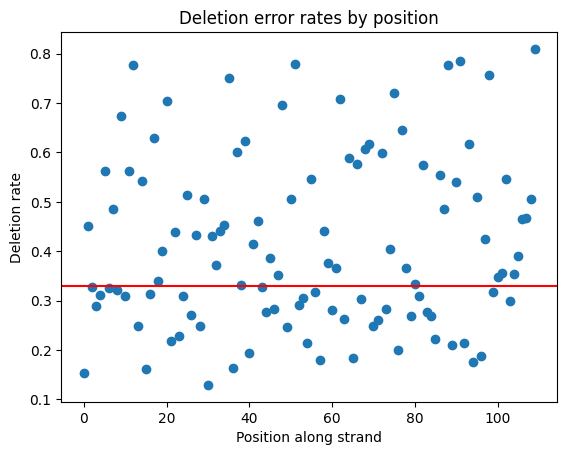

In [41]:
plt.plot(error_by_position/len(final_strands), 'o')
plt.title("Deletion error rates by position")
plt.xlabel("Position along strand")
plt.ylabel("Deletion rate")
plt.axhline(0.33, color='r')


Text(0.5, 1.0, 'Error rates by position histogram')

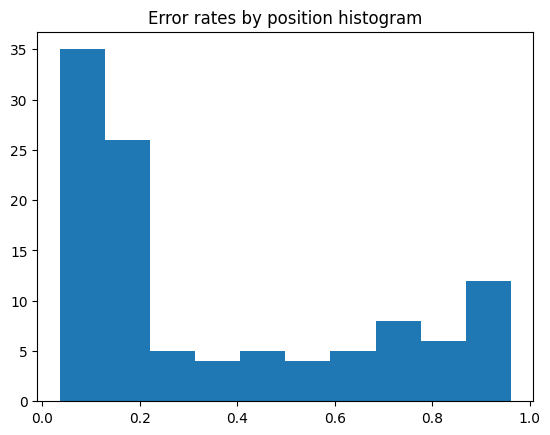

In [85]:
plt.hist(error_by_position/len(final_strands))
plt.title("Error rates by position histogram")

In [94]:
positional_error

[np.int64(9),
 np.int64(11),
 np.int64(12),
 np.int64(14),
 np.int64(19),
 np.int64(20),
 np.int64(27),
 np.int64(34),
 np.int64(35),
 np.int64(37),
 np.int64(42),
 np.int64(47),
 np.int64(48),
 np.int64(50),
 np.int64(51),
 np.int64(62),
 np.int64(64),
 np.int64(66),
 np.int64(68),
 np.int64(72),
 np.int64(75),
 np.int64(77),
 np.int64(82),
 np.int64(88),
 np.int64(90),
 np.int64(91),
 np.int64(93),
 np.int64(97),
 np.int64(98),
 np.int64(102),
 np.int64(108),
 np.int64(109)]

## Examining deletion profiles

In [29]:
unique_strand_counter = {}

for i in strands_to_be_clustered:
    if i in unique_strand_counter:
        unique_strand_counter[i] += 1
    else:
        unique_strand_counter[i] = 0

In [31]:
len(unique_strand_counter)

79017

In [32]:
unique_strand_lens = [len(i) for i in unique_strand_counter.keys()]

(array([4.791e+03, 7.241e+04, 8.570e+02, 2.840e+02, 6.000e+02, 5.800e+01,
        1.300e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10. ,  66.7, 123.4, 180.1, 236.8, 293.5, 350.2, 406.9, 463.6,
        520.3, 577. ]),
 <BarContainer object of 10 artists>)

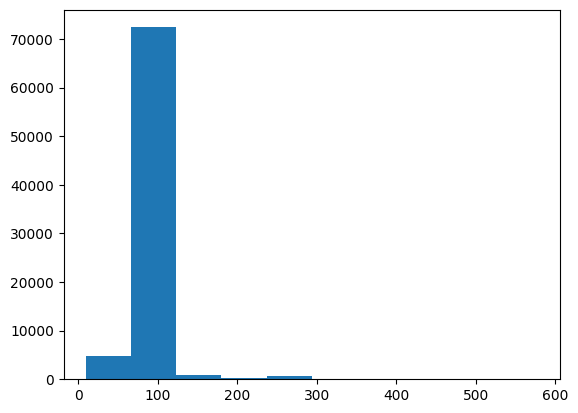

In [34]:
plt.hist(unique_strand_lens)

In [36]:
filtered_strands = [i for i in unique_strand_counter.keys() if len(i) > 70 and len(i) < 110]

(array([2.4645e+04, 2.7000e+02, 1.4500e+02, 1.3000e+02, 5.5000e+01,
        5.9000e+01, 2.1000e+01, 9.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

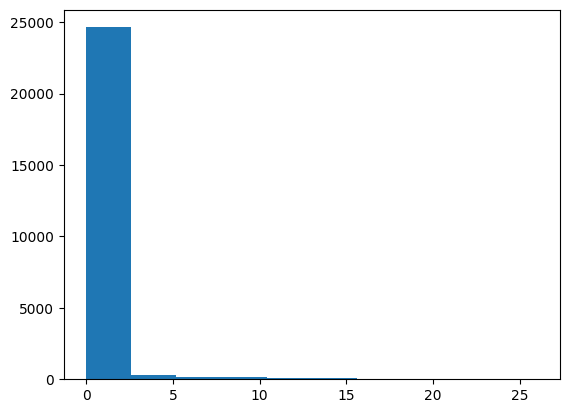

In [38]:
plt.hist([unique_strand_counter[i] for i in filtered_strands])

In [40]:
# Quantifying number of deletions over the profiles
deletions = [110 - len(i) for i in filtered_strands]

Text(0, 0.5, 'Number of deletion profiles')

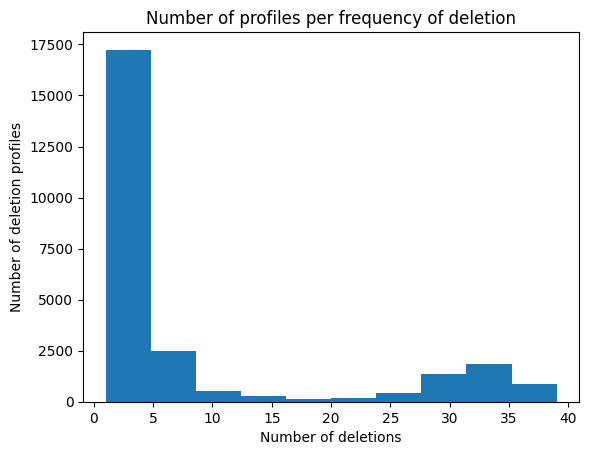

In [43]:
plt.hist(deletions)
plt.title("Number of profiles per frequency of deletion")
plt.xlabel("Number of deletions")
plt.ylabel("Number of deletion profiles")

In [47]:
len(original_strand[20:-20])

110

In [50]:
for i in filtered_strands:
    if len(i) > 100:
        print(distance(i, original_strand[20:-20]))
        print(distance(utils.reverse_complement(i), original_strand[20: -20]))
        print()

59
64

58
57

59
59

61
57

61
61

61
56

56
62

62
63

5
57

56
58

57
59

62
56

64
59

61
58

63
57

57
66

54
61

61
57

58
61

64
60

59
63

61
54

62
59

58
55

56
65

65
61

56
58

56
58

58
58

57
63

61
62

65
59

58
61

62
61

62
63

62
59

60
61

56
60

59
60

62
56

61
58

60
62

65
63

60
53

65
61

59
59

58
57

58
1

60
63

62
57

53
59

56
59

57
4

63
58

64
60

63
57

56
10

65
60

61
61

58
57

58
59

61
63

58
65

60
60

59
57

61
60

58
61

66
66

62
61

63
63

4
55

58
62

7
59

57
59

60
57

60
63

61
60

63
61

63
57

60
62

61
63

59
61

60
3

60
59

56
56

63
62

3
56

63
59

61
58

59
58

58
3

58
8

60
60

61
62

61
61

62
59

64
63

64
61

59
59

62
58

56
60

57
12

60
62

63
61

65
60

61
60

60
61

62
63

61
60

56
62

59
57

64
62

57
60

58
60

63
55

59
52

54
48

63
59

62
9

59
60

61
56

63
57

54
58

60
61

60
58

64
62

59
61

59
58

62
58

58
62

59
62

56
62

60
58

53
56

57
3

59
64

56
58

66
61

59
63

57
62

59
58

60
57

62
60

64
59

60


In [20]:
len(strands[21])

151

## 4.5 seconds coupling time

Same strand, 4.5 seconds coupling time